In [1]:
# 1. Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import joblib
%matplotlib inline

In [2]:
# 2. Load Dataset
data = pd.read_csv('/mnt/data/Data_edunet.csv')
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:
# 3. Overview of the Dataset
print("Shape of the dataset:", data.shape)
data.info()

Shape of the dataset: (48842, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [4]:
# 4. Summary Statistics
data.describe(include='all')

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
count,48842.000000,48842,4.884200e+04,48842,48842.000000,48842,48842,48842,48842,48842,48842.000000,48842.000000,48842.000000,48842,48842
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,33906,NaN,15784,NaN,22379,6172,19716,41762,32650,NaN,NaN,NaN,43832,37155
mean,38.643585,NaN,1.896641e+05,NaN,10.078089,NaN,NaN,NaN,NaN,NaN,1079.067626,87.502314,40.422382,NaN,NaN
std,13.710510,NaN,1.056040e+05,NaN,2.570973,NaN,NaN,NaN,NaN,NaN,7452.019058,403.004552,12.391444,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.175505e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.781445e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.376420e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [5]:
# 5. Check for Missing Values
data.replace("?", np.nan, inplace=True)
data.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [6]:
# 6. Drop Rows with Missing Values
data.dropna(inplace=True)
data.shape

(45222, 15)

In [7]:
# 7. Encode Categorical Columns
label_encoders = {}
for col in data.select_dtypes(include='object').columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,2,226802,1,7,4,6,3,2,1,0,0,40,38,0
1,38,2,89814,11,9,2,4,0,4,1,0,0,50,38,0
2,28,1,336951,7,12,2,10,0,4,1,0,0,40,38,1
3,44,2,160323,15,10,2,6,0,2,1,7688,0,40,38,1
5,34,2,198693,0,6,4,7,1,4,1,0,0,30,38,0


In [8]:
# 8. Define Features and Target
X = data.drop("income", axis=1)
y = data["income"]

In [9]:
# 9. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# 10. Train Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [11]:
# 11. Make Predictions and Evaluate
y_pred = model.predict(X_test)
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy Score: 0.8560530679933664

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.91      6842
           1       0.75      0.62      0.68      2203

    accuracy                           0.86      9045
   macro avg       0.82      0.77      0.79      9045
weighted avg       0.85      0.86      0.85      9045



In [12]:
# 12. Save Model and Encoders
joblib.dump(model, "best_model.pkl")
joblib.dump(label_encoders, "label_encoders.pkl")

['label_encoders.pkl']

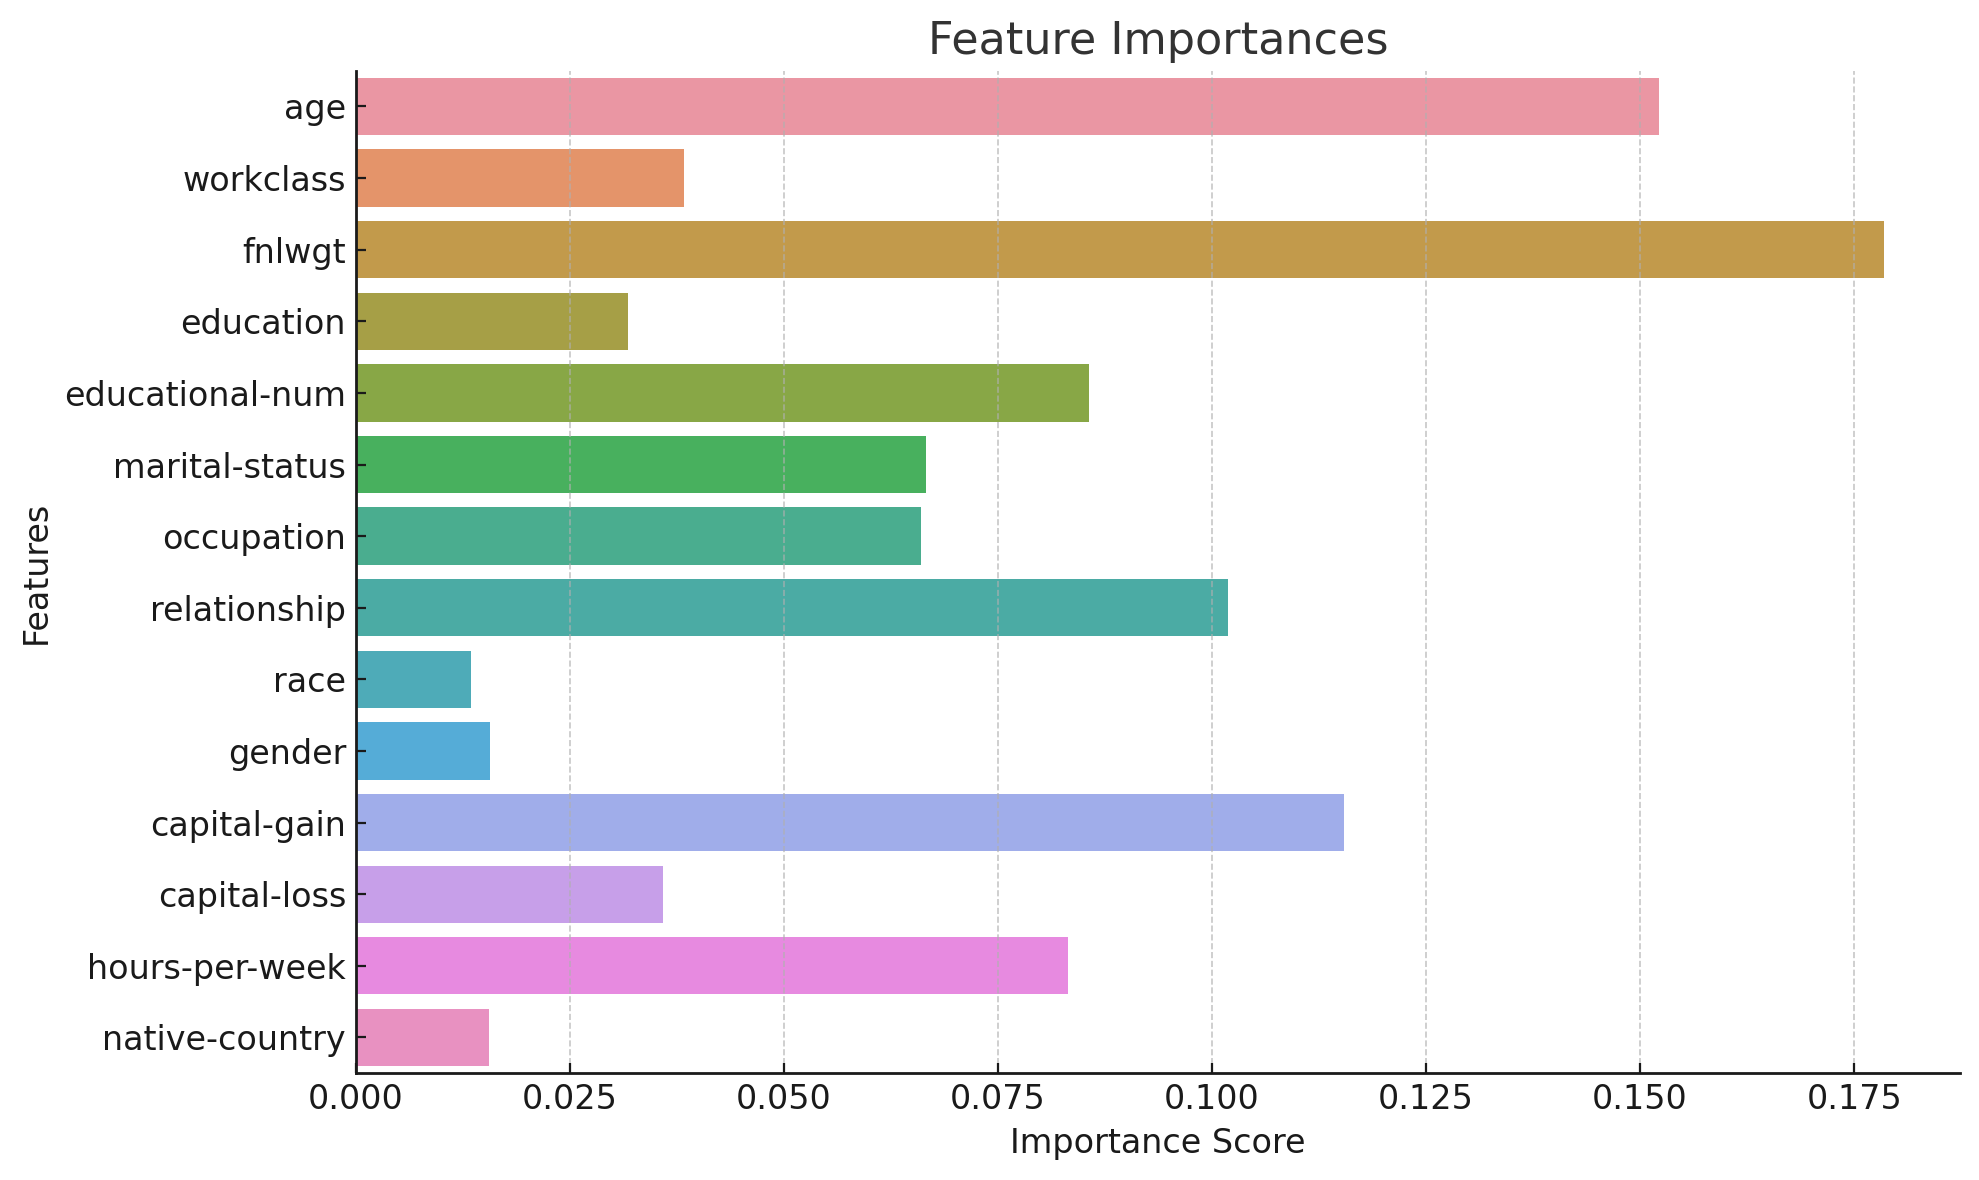

In [13]:
# 13. Feature Importance Plot
importances = model.feature_importances_
feature_names = X.columns
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importances")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

In [ ]:
#  Skipped Streamlit section during notebook execution
# # 14. Streamlit App Code (app.py)
# import streamlit as st
# import pandas as pd
# import joblib
# 
# # Load model and encoders
# model = joblib.load("best_model.pkl")
# label_encoders = joblib.load("label_encoders.pkl")
# 
# st.set_page_config(page_title="Employee Salary Classification", page_icon="💼", layout="centered")
# st.title(" Employee Salary Classification App")
# st.markdown("Predict whether an employee earns **>50K** or **≤50K** based on various features.")
# 
# # Sidebar inputs
# st.sidebar.header("Input Employee Details")
# age = st.sidebar.slider("Age", 18, 90, 30)
# workclass = st.sidebar.selectbox("Workclass", label_encoders["workclass"].classes_)
# education = st.sidebar.selectbox("Education", label_encoders["education"].classes_)
# marital_status = st.sidebar.selectbox("Marital Status", label_encoders["marital-status"].classes_)
# occupation = st.sidebar.selectbox("Occupation", label_encoders["occupation"].classes_)
# relationship = st.sidebar.selectbox("Relationship", label_encoders["relationship"].classes_)
# race = st.sidebar.selectbox("Race", label_encoders["race"].classes_)
# gender = st.sidebar.selectbox("Gender", label_encoders["gender"].classes_)
# hours_per_week = st.sidebar.slider("Hours per Week", 1, 99, 40)
# native_country = st.sidebar.selectbox("Native Country", label_encoders["native-country"].classes_)
# 
# # Input DataFrame
# input_dict = {
#     "age": age,
#     "workclass": workclass,
#     "education": education,
#     "marital-status": marital_status,
#     "occupation": occupation,
#     "relationship": relationship,
#     "race": race,
#     "gender": gender,
#     "hours-per-week": hours_per_week,
#     "native-country": native_country
# }
# 
# input_df = pd.DataFrame([input_dict])
# 
# # Encode categorical columns
# for col in input_df.select_dtypes(include='object').columns:
#     input_df[col] = label_encoders[col].transform(input_df[col])
# 
# st.write("###  Input Data")
# st.write(input_df)
# 
# # Predict
# if st.button("Predict Salary Class"):
#     prediction = model.predict(input_df)
#     label = ">50K" if prediction[0] == 1 else "≤50K"
#     st.success(f" Prediction: {label}")

In [ ]:
#Skipped Streamlit section during notebook execution
# # 15. Optional Batch Prediction Section in Streamlit
# st.markdown("---")
# st.markdown("###  Batch Prediction")
# uploaded_file = st.file_uploader("Upload CSV for batch prediction", type=["csv"])
# 
# if uploaded_file is not None:
#     try:
# data = pd.read_csv('/mnt/data/Data_edunet.csv')
#         for col in batch_data.select_dtypes(include='object').columns:
#             if col in label_encoders:
#                 batch_data[col] = label_encoders[col].transform(batch_data[col])
#         preds = model.predict(batch_data)
#         batch_data['PredictedClass'] = [">50K" if p == 1 else "≤50K" for p in preds]
#         st.write(" Predictions:")
#         st.write(batch_data.head())
# 
#         csv = batch_data.to_csv(index=False).encode("utf-8")
#         st.download_button("Download Predictions", csv, "salary_predictions.csv", "text/csv")
#     except Exception as e:
#         st.error(f"Error: {e}")